In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [5]:
data=pd.read_csv("data.csv")

In [6]:
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [7]:
data.shape

(4600, 18)

In [8]:
data[data.isnull().any(axis=1)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [10]:
data[data.duplicated()]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


In [11]:
x=data.drop(columns=["date","price","street","country","statezip","city"])
y=data["price"]
x.shape

(4600, 12)

<function matplotlib.pyplot.show(close=None, block=None)>

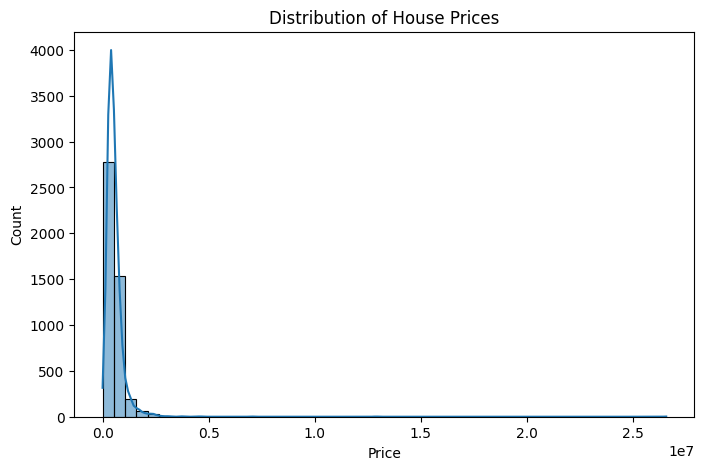

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(y,bins=50,kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show

In [13]:
x=pd.get_dummies(x,drop_first=True)

In [14]:
x.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
x_train.shape

(3680, 12)

In [17]:
model=LinearRegression()

In [18]:
model.fit(x_train,y_train)

LinearRegression()

In [19]:
m=model.coef_
m

array([-6.44974616e+04,  3.65204407e+04,  1.86049845e+02, -5.14414161e-01,
        6.98247401e+04,  3.82459666e+05,  4.47558418e+04,  2.93355394e+04,
        9.68608170e+01,  8.91890277e+01, -2.56916353e+03,  8.25991734e+00])

In [20]:
b=model.intercept_
b

np.float64(4925638.066192596)

In [21]:
y_pred=model.predict(x_test)
y_pred

array([ 304863.38578074,  326517.06991511, 1071762.53630098,
        546241.40097357,  379799.9832109 ,  605792.93622744,
        481263.57120648,  418905.11058138,  509341.5079192 ,
        530852.97588253,  682958.97641211,  414525.36130059,
        836974.40259895,  416500.85730813,  367263.43388224,
        702908.51672187,  677878.6906782 ,  515539.32998784,
       1019380.6389138 ,  861119.79490689, 1364866.2181469 ,
        637439.70016768,  634739.56666332,  470424.21250265,
        162037.15383044,  232831.37648244,  669951.050716  ,
        884080.66694993,  263027.22577206,  974954.64229471,
       1883342.16391301,  481510.29664864, 1275554.65253706,
        430994.93178867,  180366.40705422,  339240.17357422,
        792335.74094009, 1011053.14613388,  238036.20927673,
        543438.6604078 ,  423414.50597297,  243429.92107972,
        390151.30074004,  361322.67375669,  320343.34636016,
        317865.29287645,  469559.60646622,  573249.2015897 ,
        828966.75691607,

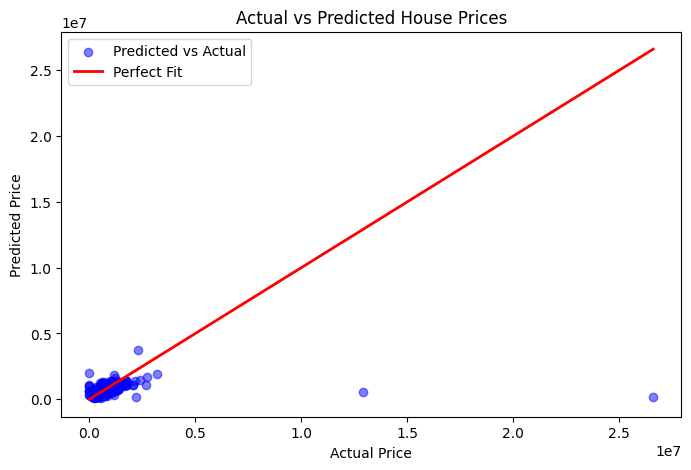

In [22]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2, label="Perfect Fit")
plt.legend()
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [23]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)

In [24]:
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")

Root Mean Squared Error: 993439.36
R2 Score: 0.0323


In [25]:
feature_importance=pd.DataFrame({
    "Feature":x.columns,
    "Importance":np.abs(model.coef_)
}).sort_values(by="Importance",ascending=False).head(15)

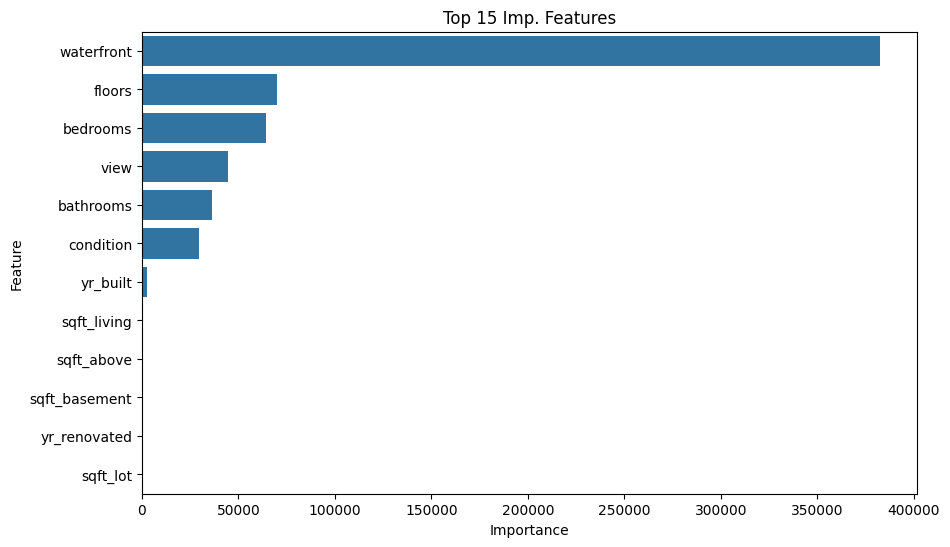

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x="Importance",y="Feature",data=feature_importance)
plt.title("Top 15 Imp. Features")
plt.show()